In [1]:
# To load the library
import rmf_tool.src.rmf_tool as rmf

# To plot the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# This code creates an object that represents a "density dependent population process"
def V_rmf(K,rho,d):
    ddpp = rmf.DDPP()
    K = 20 

    # The vector 'e(i)' is a vector where the $i$th coordinate is equal to $1$ (the other being equal to $0$)
    def e(i):
        l = np.zeros(K)
        l[i] = 1
        return(l)

    # We then add the transitions : 
    for i in range(K):
        if i>=1:
            ddpp.add_transition(e(i),eval('lambda x: {}*(x[{}]**{} - x[{}]**{})'.format(rho,i-1,d,i,d)))
        if i<K-1:
            ddpp.add_transition(-e(i),eval('lambda x: (x[{}] - x[{}])'.format(i,i+1) ))
    ddpp.add_transition(e(0), eval('lambda x : {}*(1-x[0]**{})'.format(rho,d)))
    ddpp.add_transition(-e(K-1), lambda x : x[K-1])
    
    ddpp.set_initial_state(e(0)) # We first need to define an initial stater
    pi,V,W = ddpp.meanFieldExpansionSteadyState(order=1)
    return(np.array([np.sum(pi), np.sum(V)]))


In [14]:
V_rmf(20,0.9,d=2)

array([2.35265164, 3.98642699])

In [21]:
from rmf_tool.src.refinedRefined_fixedPoint import *
from parameters_dChoice_steadyState import *
import rmf_tool.misc.jsqD_simulate.average_valueJSQ as jsqSimu

def V(K,rho,d):
    parameters = (K,d,rho)
    pi=fixedPoint(parameters)
    Fp=computeFp(parameters)
    Fpp=computeFpp(parameters)
    Q=computeQ(parameters)
    pi,V,_ = computePiV(pi,Fp,Fpp,Q)
    return(np.array([np.sum(pi), np.sum(V)]))

def piVA(K,rho,d):
    parameters = (K,d,rho)
    pi=fixedPoint(parameters)
    Fp=computeFp(parameters)
    Fpp=computeFpp(parameters)
    Q=computeQ(parameters)
    Fppp=computeFppp(parameters)
    Fpppp=computeFpppp(parameters)
    Qp=computeQp(parameters)
    Qpp=computeQpp(parameters)
    R=computeR(parameters)
    pi,V,A,_ = computePiVA(pi,Fp,Fpp,Fppp,Fpppp,Q,Qp,Qpp,R)
    return(np.array([np.sum(pi), np.sum(V), np.sum(A)]))

rho=0.9
d=2
piVA(20,rho,4)

array([ 1.60003793,  4.36009979, -1.20062302])

In [3]:
jsqSimu.loadSteadyStateAverageQueueLength(rho=0.9,d=d,N=100)

2.3930885321739126

In [4]:
#for rho in [0.7,0.8,0.9,0.95]:
#    for d in [5,2,3,4]:
#        print(V(30,rho,d)-V(40,rho,d))

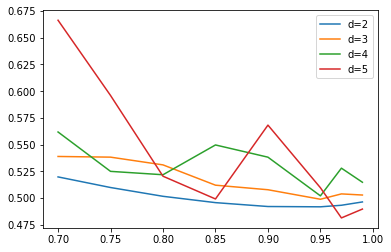

In [22]:
import numpy as np
import matplotlib.pylab as plt 
myRho = np.array([0.7,0.75,0.8,0.85,0.9,0.95,0.97,0.99])
myD = [2,3,4,5]
myPi = np.zeros((len(myRho),4))
myV = np.zeros((len(myRho),4))
for iD,d in enumerate(myD):
    for i,rho in enumerate(myRho):
        myPi[i,iD],myV[i,iD] = V(30,rho,d)

plt.figure()
for iD,d in enumerate(myD):
    plt.plot(myRho, myV[:,iD]*(1-myRho)/myRho**2 )
plt.legend(['d={}'.format(d) for d in myD])
plt.show()


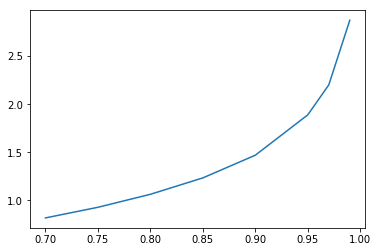

In [10]:
plt.plot(myRho,myPi[:,3])

## Evoluation of A as a function of $\rho$

In [49]:
import numpy as np
import matplotlib.pylab as plt 
myRho = np.linspace(0.8,.95,10)
myD = [2,3,4,5]
myPi = np.zeros((len(myRho),4))
myV = np.zeros((len(myRho),4))
myA = np.zeros((len(myRho),4))
for iD,d in enumerate(myD):
    for i,rho in enumerate(myRho):
        myPi[i,iD],myV[i,iD],myA[i,iD] = piVA(30,rho,d)
        print('\r',d,rho,'done',end='')


KeyboardInterrupt: 

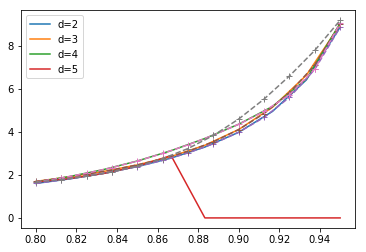

In [50]:
plt.figure()
for iD,d in enumerate(myD): plt.plot(myRho, myV[:,iD] )
for iD,d in enumerate(myD): plt.plot(myRho2, myV2[:,iD],'+--' )
plt.legend(['d={}'.format(d) for d in myD])
plt.show()

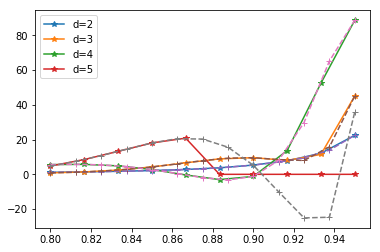

In [51]:
myRho = np.linspace(0.8,.95,10)
myRho2 = np.linspace(0.8,.95,13)
plt.figure()
myD = [2,3,4,5]
for iD,d in enumerate(myD):   plt.plot(myRho, myA[:,iD],'*-' )
for iD,d in enumerate(myD):   plt.plot(myRho2, myA2[:,iD],'+--' )
plt.legend(['d={}'.format(d) for d in myD])
plt.show()